# Genero los graficos relacionados con los avisos

#### Cargo librerias a utilizar:

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as plt
import numpy as np
import calendar
import pyspark

#### Cargo los archivos a utilizar:

In [2]:
avisos = pd.read_csv('Sources/fiuba_6_avisos_detalle.csv')

In [3]:
avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


#### Cantidad de avisos por zona:

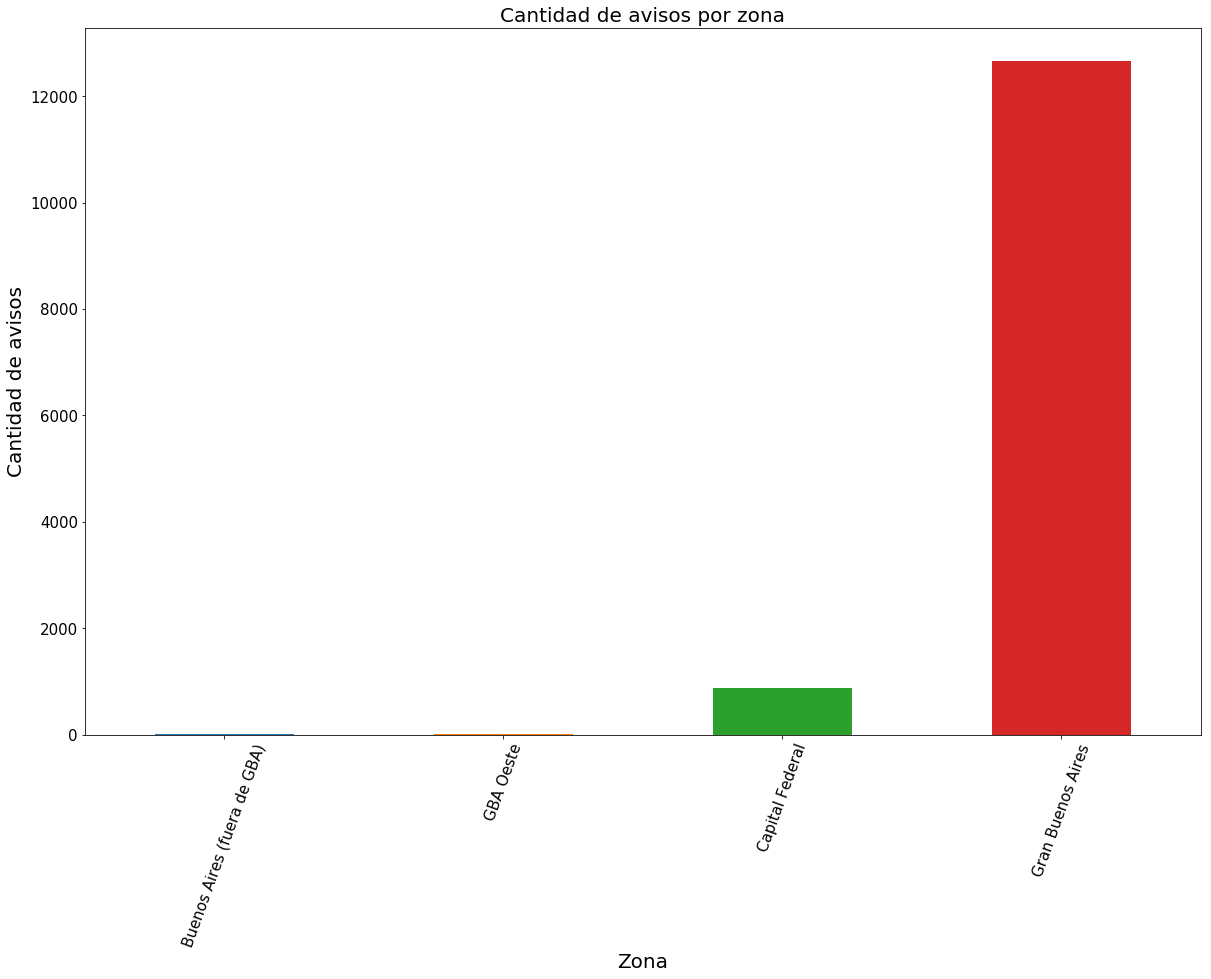

In [4]:
plt = avisos.groupby('nombre_zona').count().sort_values('idaviso').loc[:, 'idaviso'].plot.bar(figsize=(20,13))
plt.set_title('Cantidad de avisos por zona', size=20)
plt.set_xlabel('Zona',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

#### Cantidad de avisos por area de trabajo

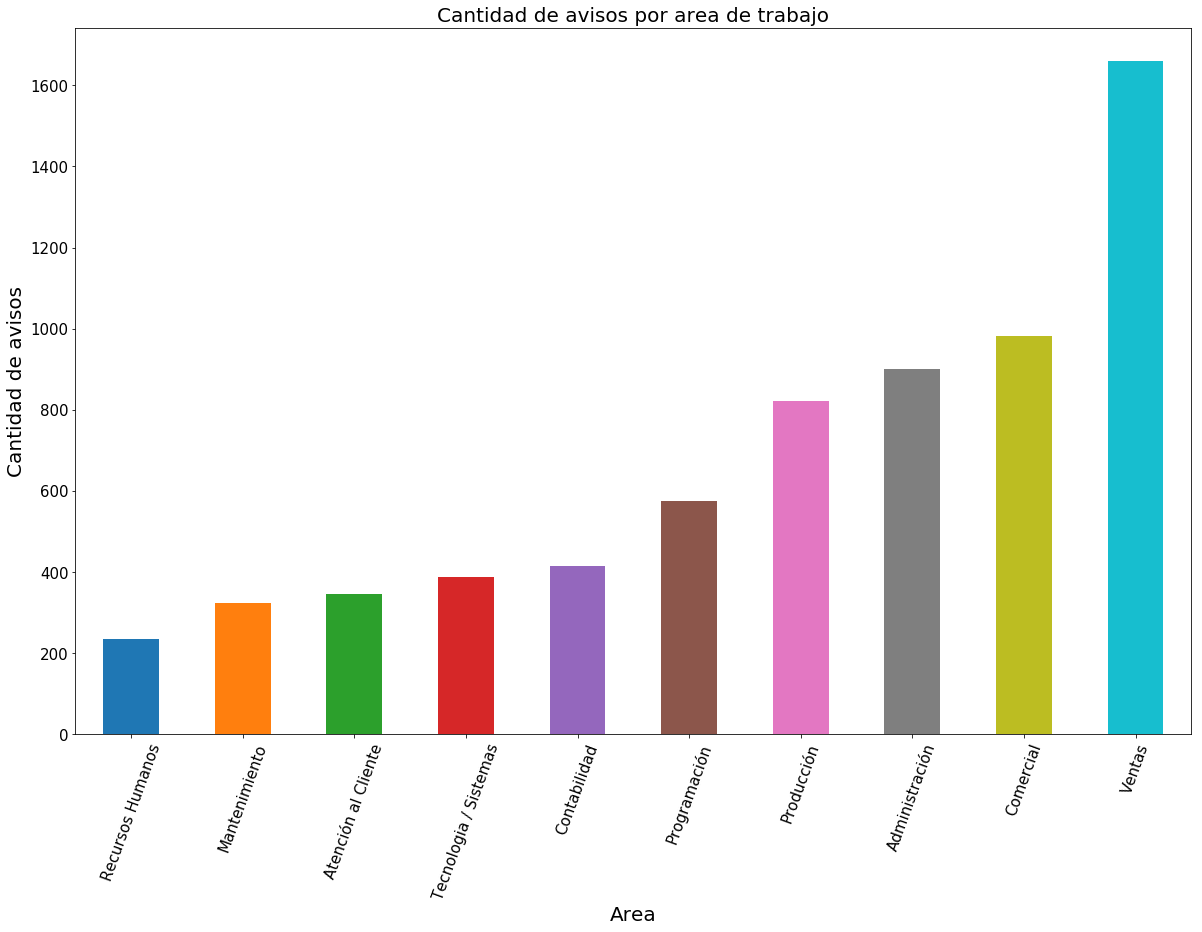

In [5]:
plt = avisos.groupby('nombre_area').count().sort_values('idaviso')[-10:].loc[:, 'idaviso'].plot.bar(figsize=(20,13))
plt.set_title('Cantidad de avisos por area de trabajo', size=20)
plt.set_xlabel('Area',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

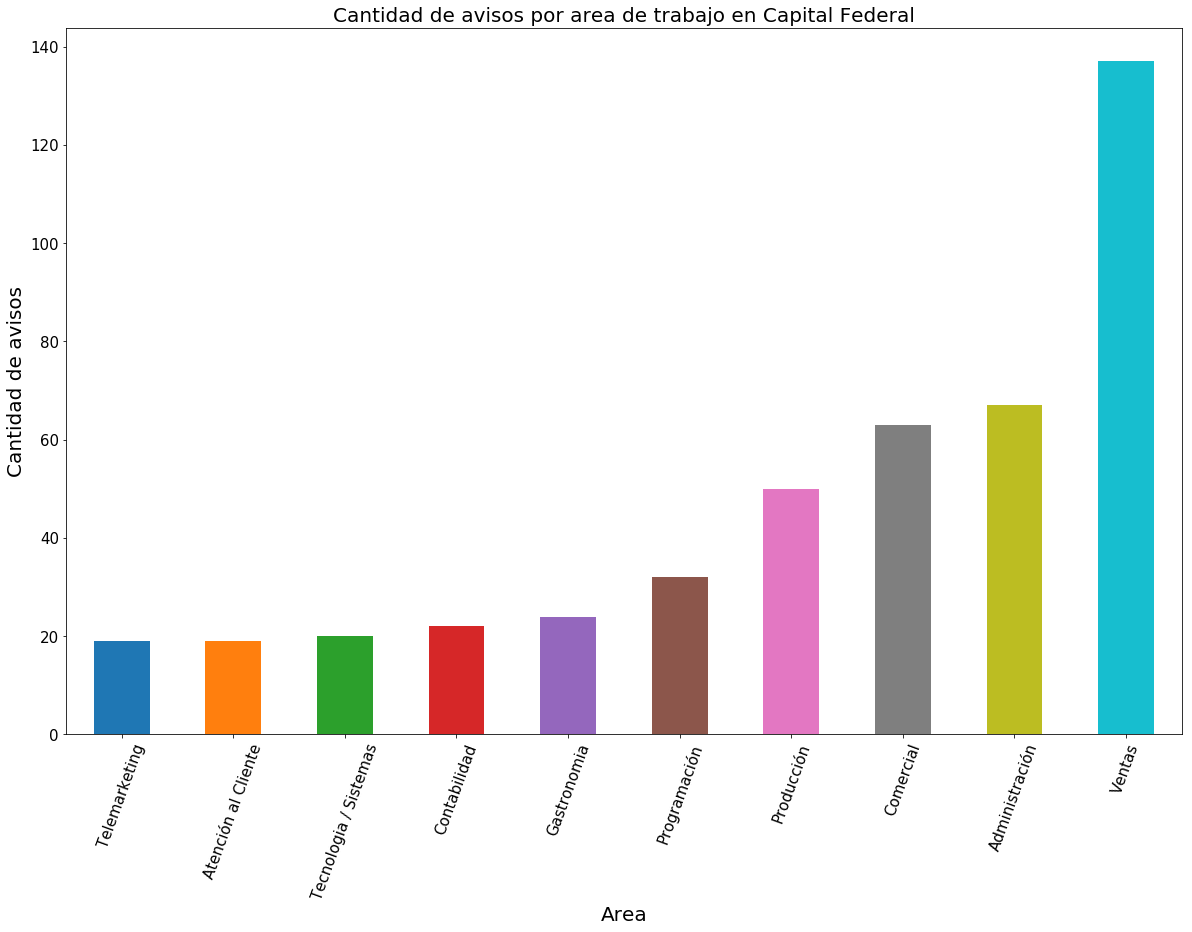

In [6]:
plt = avisos.groupby('nombre_zona').get_group('Capital Federal').groupby('nombre_area').count().sort_values('idaviso')[-10:].loc[:, 'idaviso'].plot.bar(figsize=(20,13))
plt.set_title('Cantidad de avisos por area de trabajo en Capital Federal', size=20)
plt.set_xlabel('Area',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

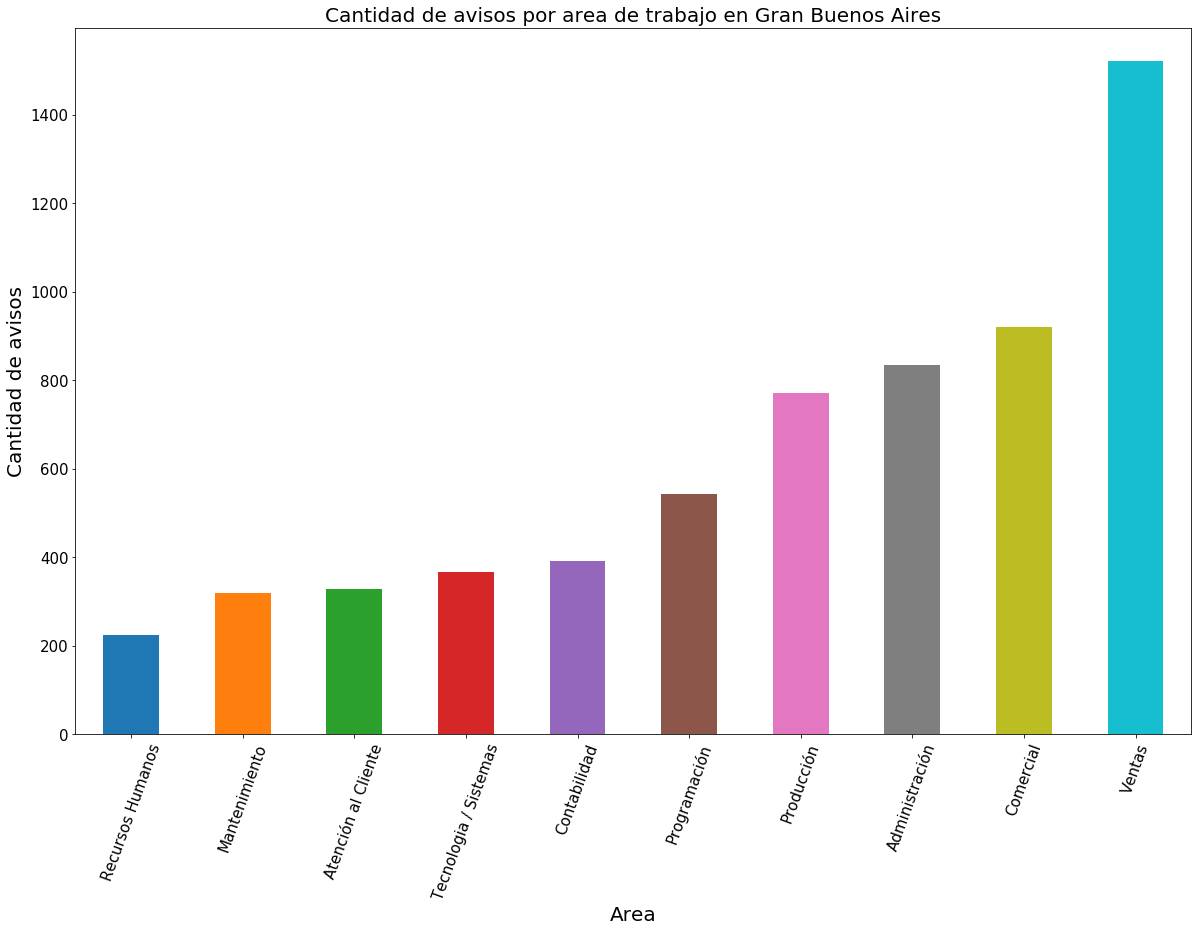

In [7]:
plt = avisos.groupby('nombre_zona').get_group('Gran Buenos Aires').groupby('nombre_area').count().sort_values('idaviso')[-10:].loc[:, 'idaviso'].plot.bar(figsize=(20,13))
plt.set_title('Cantidad de avisos por area de trabajo en Gran Buenos Aires', size=20)
plt.set_xlabel('Area',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

#### Cantidad de avisos por tipo de trabajo

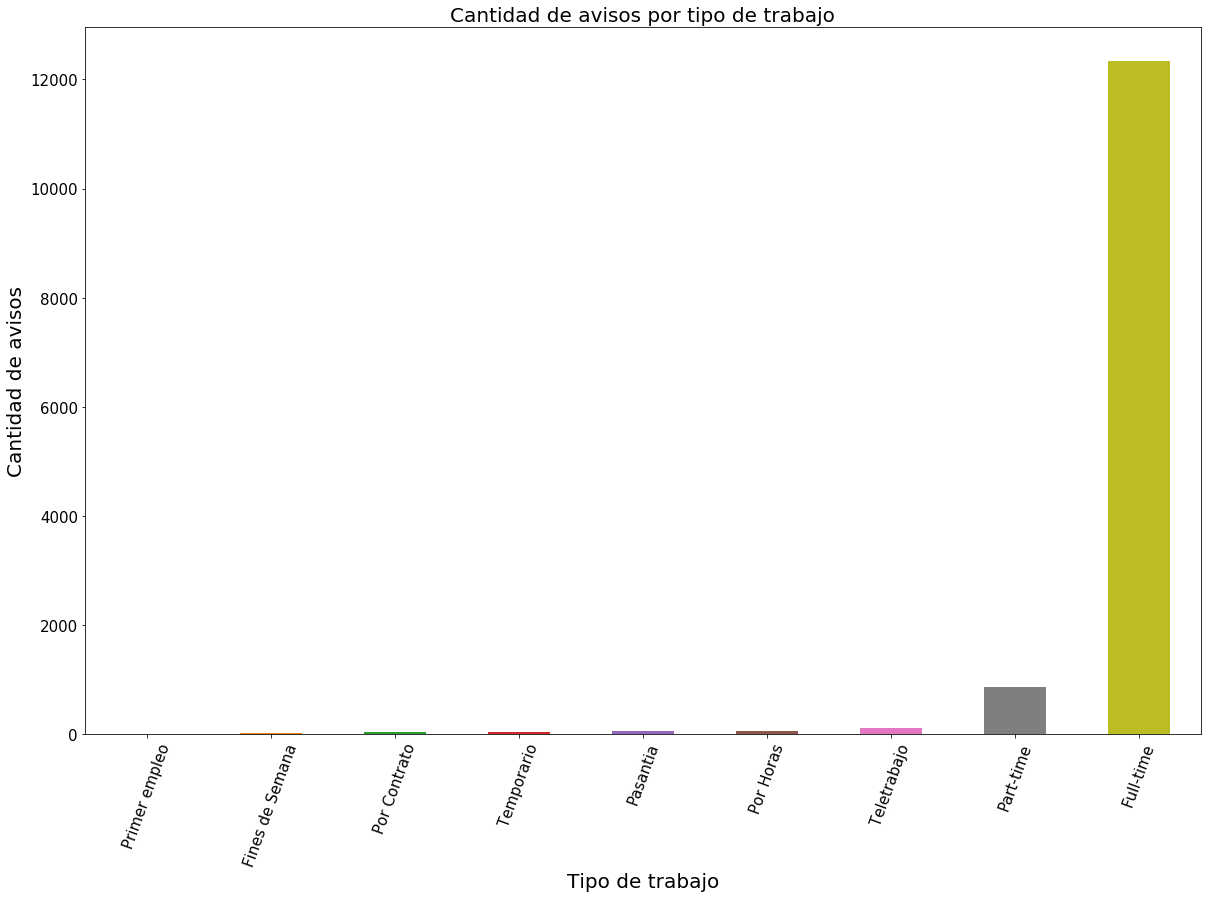

In [8]:
plt = avisos.groupby('tipo_de_trabajo').count().sort_values('idaviso').loc[:,'idaviso'].plot.bar(figsize=(20,13))
plt.set_title('Cantidad de avisos por tipo de trabajo', size=20)
plt.set_xlabel('Tipo de trabajo',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

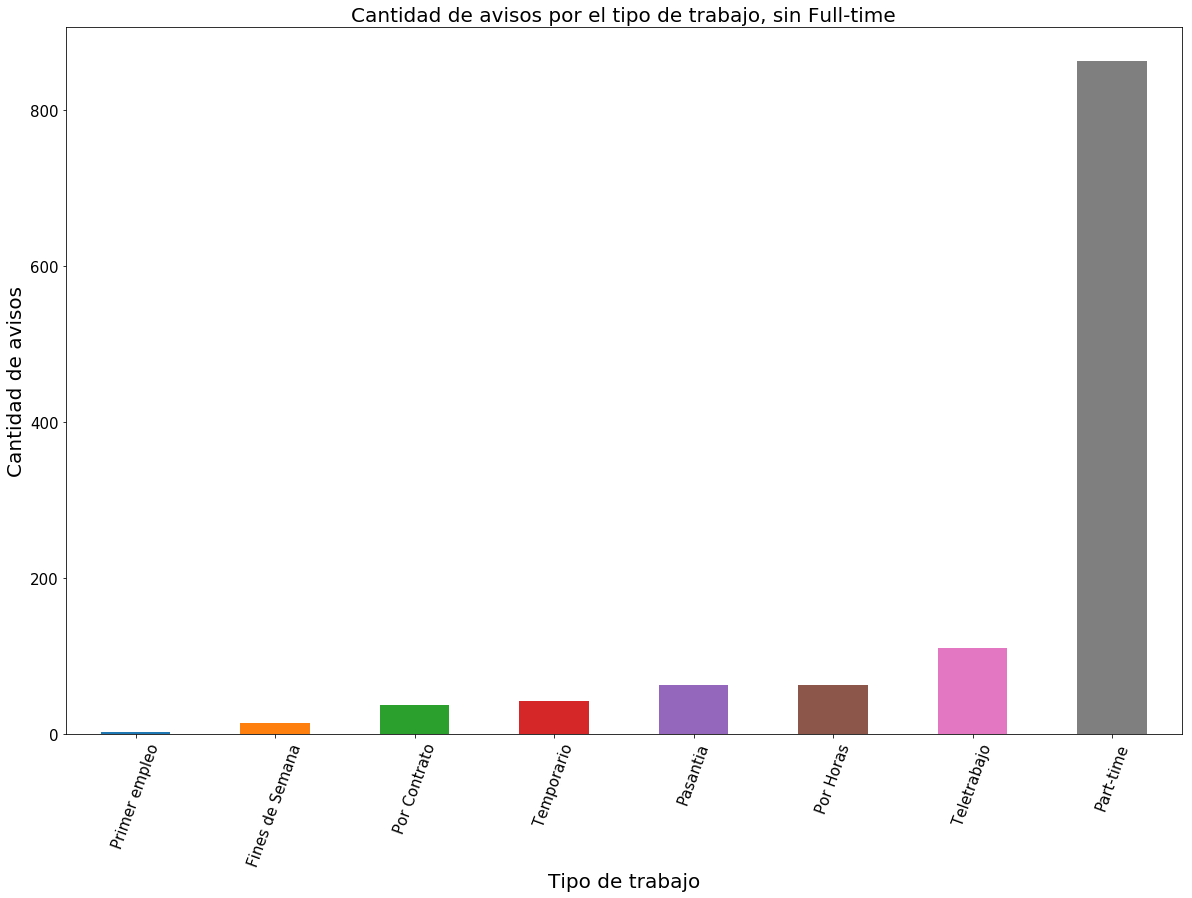

In [9]:
plt = avisos.groupby('tipo_de_trabajo').count().sort_values('idaviso')[:-1].loc[:,'idaviso'].plot.bar(figsize=(20,13))
plt.set_title('Cantidad de avisos por el tipo de trabajo, sin Full-time', size=20)
plt.set_xlabel('Tipo de trabajo',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

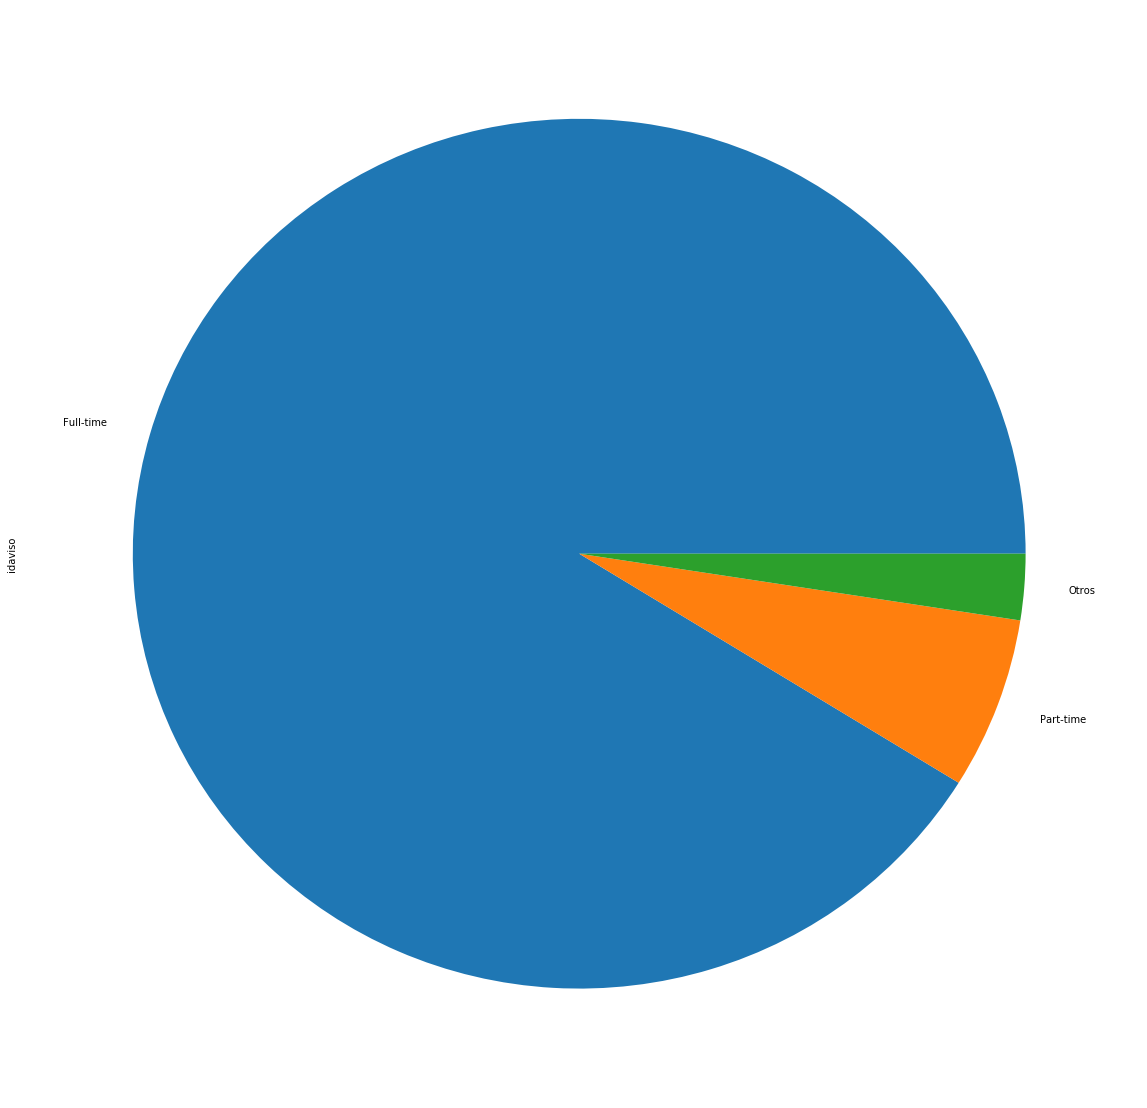

In [10]:
otros = pd.DataFrame({'Otros':(avisos.groupby('tipo_de_trabajo').count().sort_values('idaviso')[:-2].sum())}).transpose()
index = avisos.groupby('tipo_de_trabajo').count().sort_values('idaviso')[:-2].index
aux = avisos.groupby('tipo_de_trabajo').count().drop(index)
res = pd.concat([aux,otros])
res.loc[:,'idaviso'].plot.pie(figsize=(20,20))

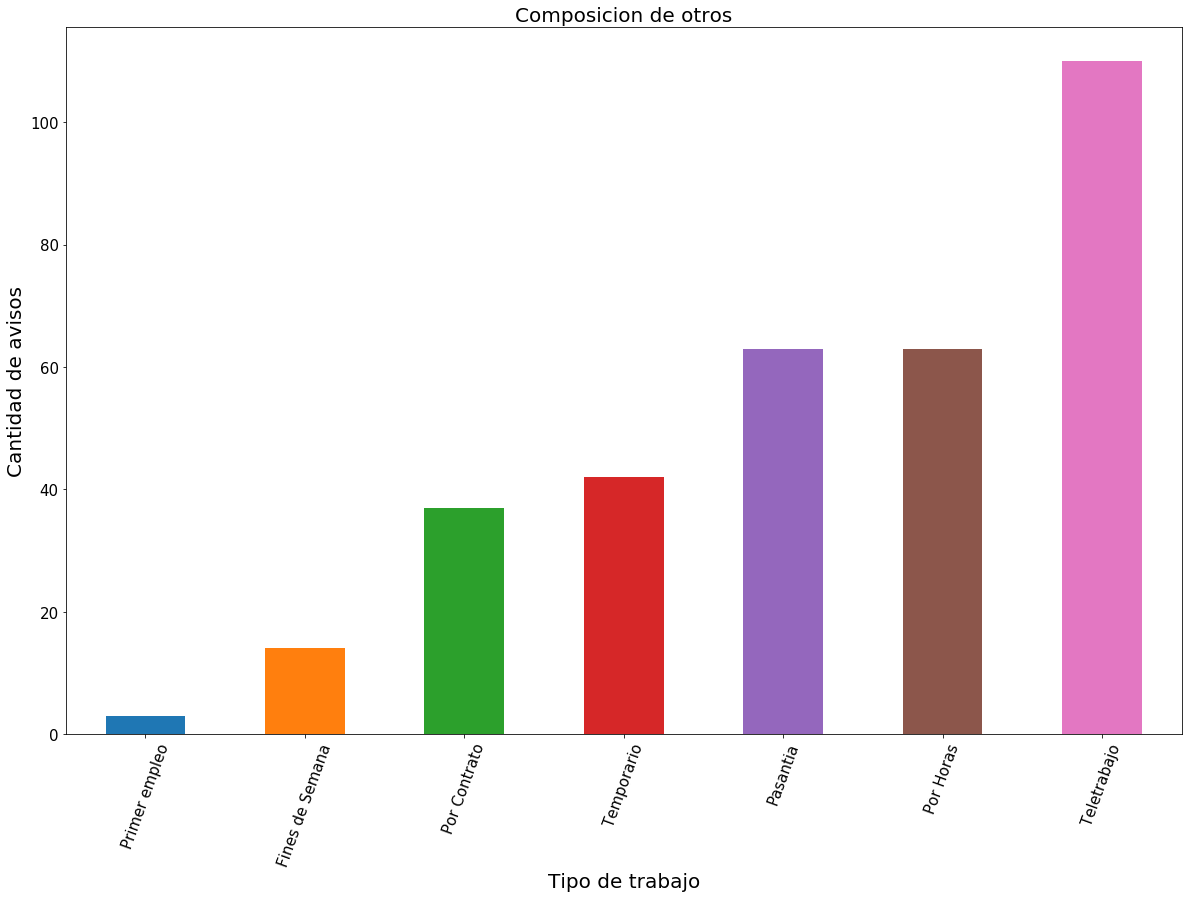

In [11]:
plt = avisos.groupby('tipo_de_trabajo').count().sort_values('idaviso')[:-2].loc[:,'idaviso'].plot.bar(figsize=(20,13))
plt.set_title('Composicion de otros', size=20)
plt.set_xlabel('Tipo de trabajo',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

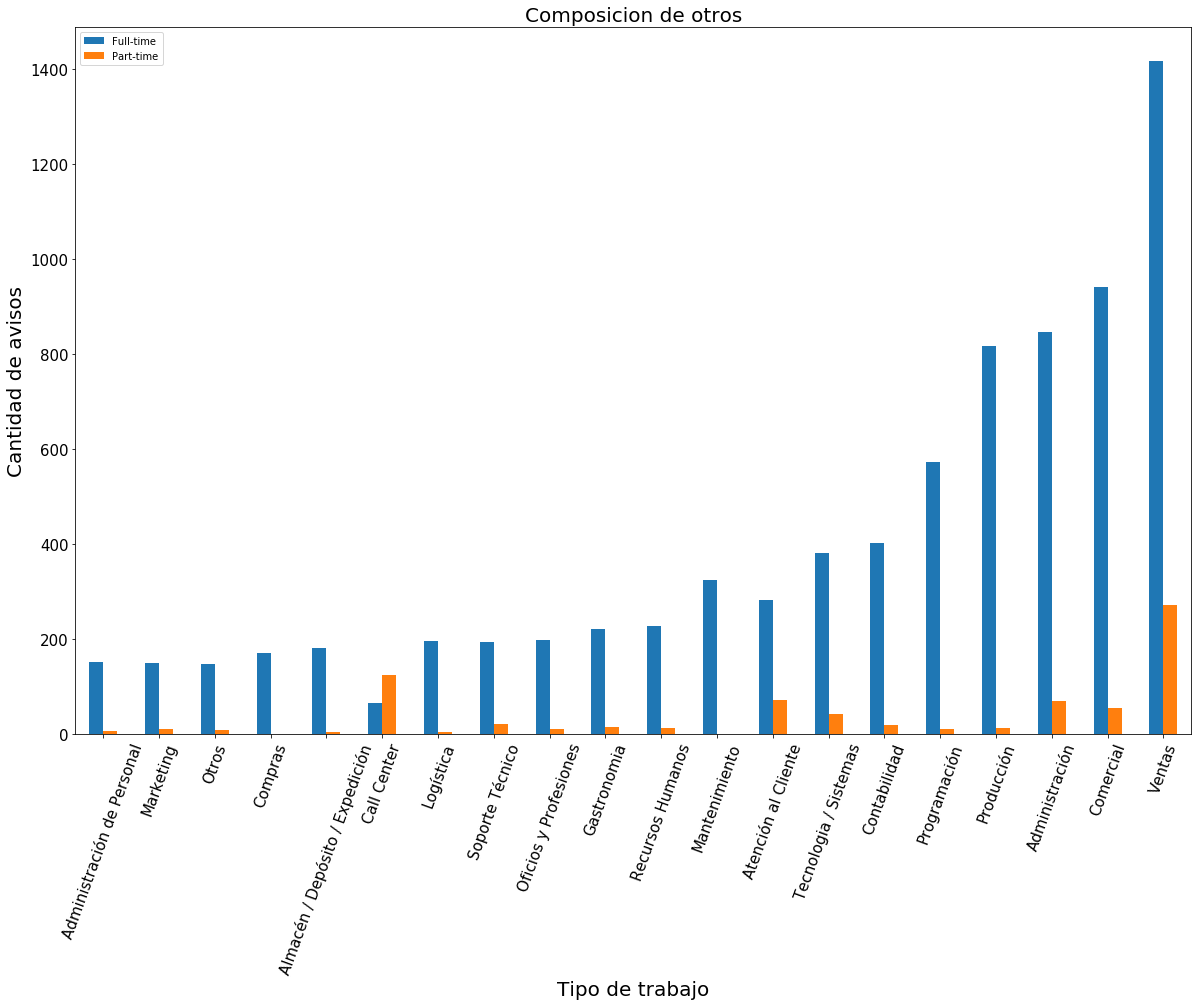

In [12]:
aux = avisos
aux['Full-time'] = avisos['tipo_de_trabajo'] == 'Full-time'
aux['Part-time'] = avisos['tipo_de_trabajo'] == 'Part-time'
aux.loc[avisos['tipo_de_trabajo'] == 'Part-time','Full-time'] = np.NaN
aux.loc[avisos['tipo_de_trabajo'] == 'Full-time','Part-time'] = np.NaN
plt = aux.groupby('nombre_area').count().sort_values('idaviso')[-20:].loc[:,['Full-time','Part-time']].plot.bar(figsize=(20,13))
plt.set_title('Composicion de otros', size=20)
plt.set_xlabel('Tipo de trabajo',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

#### Cantidad de avisos por nivel laboral


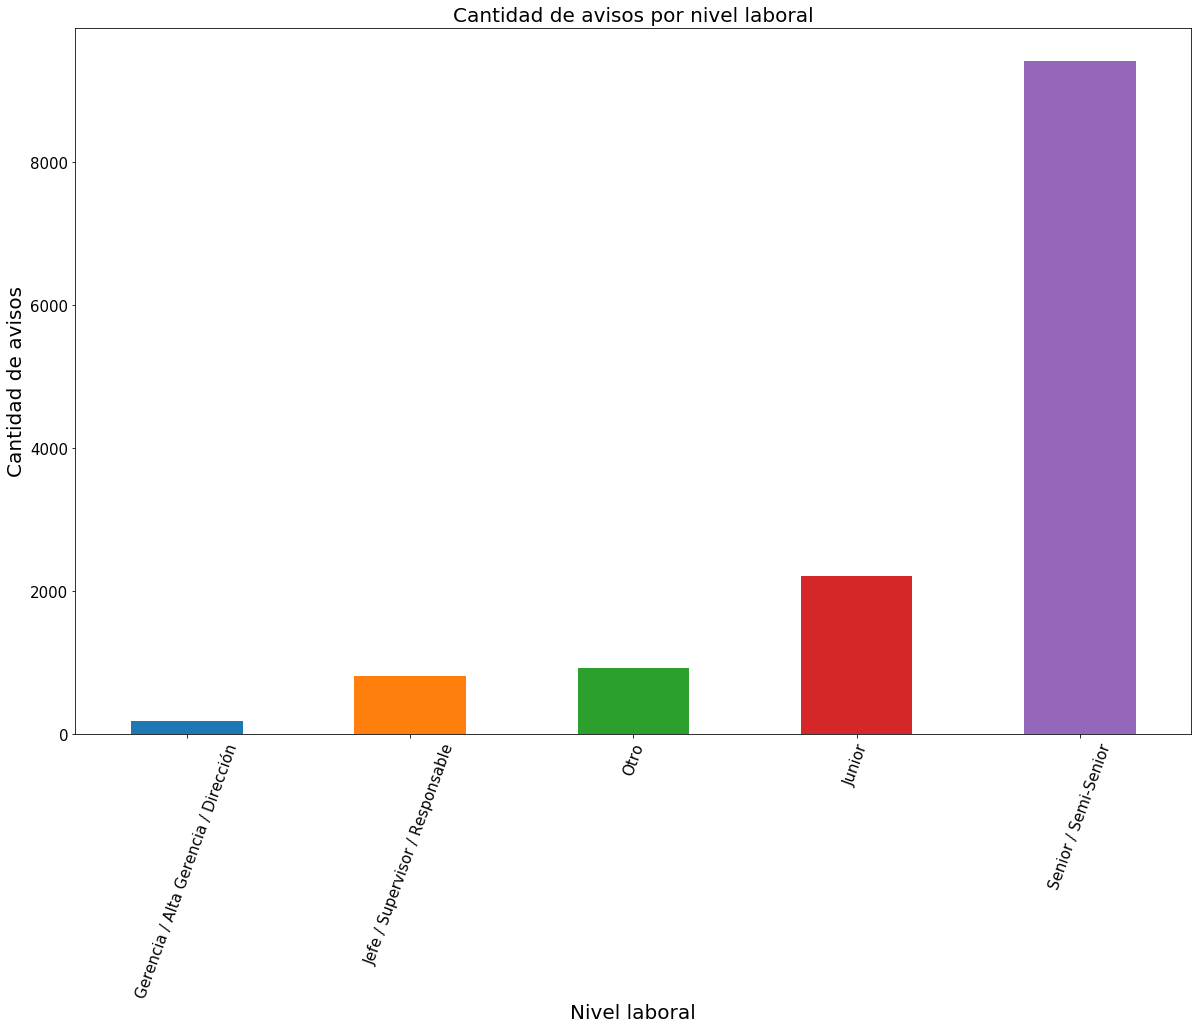

In [14]:
plt = aux.groupby('nivel_laboral').count().sort_values('idaviso')[-20:].loc[:,'idaviso'].plot.bar(figsize=(20,13))
plt.set_title('Cantidad de avisos por nivel laboral', size=20)
plt.set_xlabel('Nivel laboral',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

In [ ]:
plt = aux.groupby('nombre_zona').get_group('Capital Federal').groupby('nivel_laboral').count().sort_values('idaviso')[-20:].loc[:,'idaviso'].plot.bar(figsize=(20,13))
plt.set_title('Cantidad de avisos por nivel laboral', size=20)
plt.set_xlabel('Nivel laboral',size=20)
plt.set_ylabel('Cantidad de avisos',size=20)
plt.tick_params(axis='x', labelrotation=70, labelsize=15)
plt.tick_params(axis='y', labelsize=15)